In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("lec_act_3_fitting.ipynb")

# Fit a line to the middle part of the finger 1 motor positions

It might be helpful to look at the instruction/background slides before tackling this

https://docs.google.com/presentation/d/1IoiD43zjp_XOEH0soCZGMBN4b13KWVndoHAxoUJMQoM/edit?usp=sharing

Lecture goals:
- Extract a subset of data based on conditions
- Use linregress to approximate linear data

In [2]:
# Doing the imports for you
import numpy as np
import json as json
from scipy.stats import linregress
import matplotlib.pyplot as plt

# Read the motor position data in
The motor position data has already been cut out and put in separate .csv files for you (see Lecture script, slides). 

TODO: Read the data in using numpy's loadtxt.

The shape of the data should be (355, 40) and (305, 40)

In [3]:

# TODO Read in week3_Motor position f1_success and failed .csv files
data_successful = np.loadtxt("Data/Week3_Motor position f1_successful.csv", delimiter=',')
data_failed = np.loadtxt("Data/Week3_Motor position f1_failed.csv", delimiter=',')

expected_shape_successful = (355, 40)
expected_shape_failed = (305, 40)

if data_successful.shape == expected_shape_successful and data_failed.shape == expected_shape_failed:
    print("Data loaded successfully.")
else:
    print("The shape of the loaded data does not match the expected shape.")
# END PROMPT"""


Data loaded successfully.


In [4]:
grader.check("Read data")

Read data results: All test cases passed!

# Fit a line to the middle points

Doing this as a function so you can use it twice.

Some decisions:
- Pass in the data as two arrays, the t and y values
-     Use fit_line_to_middle_bit function to pull out the "middle" bit
- Returns the points of intersection with the min/max values (rather than slope and intercept) because in the long run that's what we care about (where the motor started and stopped)
- The eps is a "fudge factor" so that you can clip out data above/below a threshhold

Two ways to do this:
- Clip with a fudge factor, use np.logical_and fudge factor should be d_y = eps * (y_max - y_min), 
   take all points y_min + d_y < y < y_max - dy
- Use np.where to find the first index > y_min + d_y (or < y_max - d_y)
    np.where returns an array of arrays; use index[0][0] to get the value out
    Then use start:end to get the values out of ts, ys

## Implementation steps (suggested)

Step 1: Start with just fitting the entire data and drawing the resulting line
    Use y = mx + b equation to find start/stop points from slope/intercept
       Find max/min y values, and plug those into the equation
    You should get something that goes roughly from the bottom left to the top right of the original data

Step 2: Clip just the y_max values by using boolean indexing to keep just part of the array
   Alternate: Use np.where to find the max value, extract the ending index, and use 0:end_index

Step 3: Clip both ends at the same time (change the boolean indexing to use a logical_and)
    Alternate: Use np.where a second time to find the min value, extract the starting index

In [5]:
def fit_line_to_middle_bit(ts, ys, eps=1e-2):
    """ Fit a line to the sloped middle bit of the data
      Return the line as a pair of points, one where the fitted line crosses the y min value, one where the line crosses
      the y max value (see slides for picture)
      Reminder; Use & to do an AND of two boolean conditions
    @param ts - the time values for the data (x-axis)
    @param ys - the function values (y-axis)
    @param eps - a fudge factor for clipping the middle bit
    @returns (x_min, y_min), (x_max, y_max)  (two tuples)"""


    # TODO: 
    #.  Get y min and y max from the data
    y_min = np.min(ys)
    y_max = np.max(ys)
    #.  Use np.where to find the index of the first y value that is bigger than ymin + eps * (ymax - ymin)
    #.  Use np.where to find the index of the last y value that is smaller than ymax - eps * (ymax - ymin)
    first_index = np.where(ys > y_min + eps * (y_max - y_min))[0][0]
    last_index = np.where(ys < y_max - eps * (y_max - y_min))[0][-1]
    #  (Check - if you've done this correctly, for the first row of the successful data set this should be around
    #.   8 and 12
    #   Get out just the data between those two indices
    bet_ts = ts[first_index:last_index + 1]
    bet_ys = ys[first_index:last_index + 1]
    #.  Do a linear regression on just that data
    #.     Don't forget to get the t values between those two indices as well
    #. After fitting, Slope should be 654.xxx, intercept 162.xxx for first row (successful data
    slope, intercept = np.polyfit(bet_ts, bet_ys, 1)
    #. Use the fitted line to get out the corresponding x values for those y values
    #.   x = (y - intercept) / slope
    x_min = (y_min - intercept) / slope
    x_max = (y_max - intercept) / slope
    # END PROMPT"""
    return (x_min, y_min), (x_max, y_max)


In [6]:
grader.check("Fit middle")

Fit middle results:
    Fit middle - 1 result:
        ❌ Test case failed
        Trying:
            assert fit_line_to_middle_bit(np.linspace(0, 1, 9), np.array([0, 0, 0, 0.25, 0.5, 0.75, 1, 1, 1]), eps=0.001) == ((0.25, 0.0), (0.75, 1.0))
        Expecting nothing
        **********************************************************************
        Line 1, in Fit middle 0
        Failed example:
            assert fit_line_to_middle_bit(np.linspace(0, 1, 9), np.array([0, 0, 0, 0.25, 0.5, 0.75, 1, 1, 1]), eps=0.001) == ((0.25, 0.0), (0.75, 1.0))
        Exception raised:
            Traceback (most recent call last):
              File "c:\Users\user10\anaconda3\Lib\doctest.py", line 1351, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest Fit middle 0[0]>", line 1, in <module>
                assert fit_line_to_middle_bit(np.linspace(0, 1, 9), np.array([0, 0, 0, 0.25, 0.5, 0.75, 1, 1, 1]), eps=0.001) == ((0.25, 0.0), (0.75, 1.0))
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
            AssertionError

# Use the function on each data set
Call the function twice, once with the successful pick data, once with the unsuccessful.

TODO
- Create t values (time step is 1/30th of a second, make one t value for each y value, starting at 0
- Call the **fit_line_to_middle_bits** function twice, once for the first row of the successful data, once for the first row of the failed data

In [7]:
# BEGIN_SOLUTION NO PROMPT
# Know time step
time_step = 1/30
ts = np.arange(start=0, stop=data_successful.shape[1] * time_step, step=time_step)

pt_start_successful, pt_end_successful = fit_line_to_middle_bit(ts, data_successful[0])
pt_start_failed, pt_end_failed = fit_line_to_middle_bit(ts, data_failed[0])
# END SOLUTION NO PROMPT

# Create t values with appropriate step size
ts = np.arange(start=0, stop=data_successful.shape[1] * time_step, step=time_step)
pt_start_successful, pt_end_successful = fit_line_to_middle_bit(ts, data_successful[0])
pt_start_failed, pt_end_failed = fit_line_to_middle_bit(ts, data_successful[0])
# END PROMPT"""

print(f"Last time step {ts[-1]}")
print(f"Successful: {pt_start_successful} {pt_end_successful}")
print(f"Failed: {pt_start_failed} {pt_end_failed}")

Last time step 1.3
Successful: (0.21064407781369715, 299.9920044) (0.40951224714874956, 429.8800049)
Failed: (0.21064407781369715, 299.9920044) (0.40951224714874956, 429.8800049)


In [8]:
grader.check("data_for_each")

data_for_each results: All test cases passed!

# Plot the results

Plot the successful data on the left, the failed on the right.

For each plot, plot the data, the fitted line, and red X's for the start/stop end points of the line (see slides)

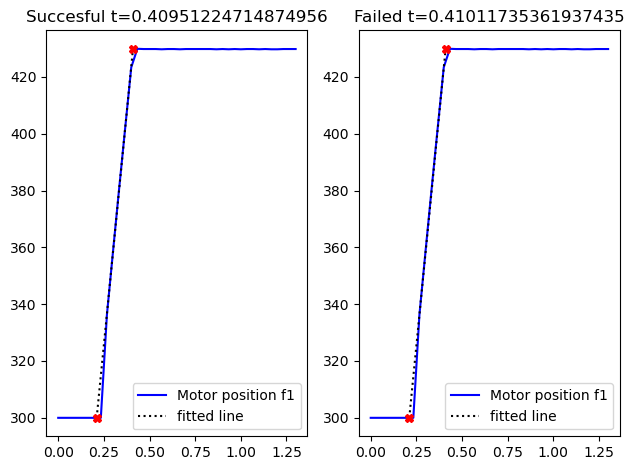

In [9]:
n_rows = 1
n_cols = 2
fig, axs = plt.subplots(n_rows, n_cols)

# BEGIN_SOLUTION NO_PROMPT
# Know time step
time_step = 1/30
ts = np.arange(start=0, stop=data_successful.shape[1] * time_step, step=time_step)

pt_start, pt_end = fit_line_to_middle_bit(ts, data_successful[0])
axs[0].plot(ts, data_successful[0], '-b', label=f"Motor position f1")
axs[0].plot([pt_start[0], pt_end[0]], [pt_start[1], pt_end[1]], ':k', label="fitted line")
axs[0].plot([pt_start[0], pt_end[0]], [pt_start[1], pt_end[1]], 'Xr')
axs[0].set_title(f"Succesful t={pt_end[0]}")
axs[0].legend()

pt_start, pt_end = fit_line_to_middle_bit(ts, data_failed[0])
axs[1].plot(ts, data_successful[0], '-b', label=f"Motor position f1")
axs[1].plot([pt_start[0], pt_end[0]], [pt_start[1], pt_end[1]], ':k', label="fitted line")
axs[1].plot([pt_start[0], pt_end[0]], [pt_start[1], pt_end[1]], 'Xr')
axs[1].set_title(f"Failed t={pt_end[0]}")
axs[1].legend()

# END_SOLUTION

# Create t values with appropriate step size
ts = ...
# TODO Plot original data and fitted line (see slides)
#  TODO: Put the end time value in the title
# END PROMPT"""
plt.tight_layout()


In [10]:
grader.check("Plot")

Plot results: All test cases passed!

## Hours and collaborators
Required for every assignment - fill out before you hand-in.

Listing names and websites helps you to document who you worked with and what internet help you received in the case of any plagiarism issues. You should list names of anyone (in class or not) who has substantially helped you with an assignment - or anyone you have *helped*. You do not need to list TAs.

Listing hours helps us track if the assignments are too long.

In [11]:

# List of names (creates a set)
worked_with_names = {}
# List of URLS (creates a set)
websites = {}
# Approximate number of hours, including lab/in-class time
hours = 10
your_column_for_wrist_torque = any
# for all row, column in all_indices_from_where
#.   if this is the column for wrist torque 
#.      print(f"Row: {r}, Time step: {c // n_time_steps} Successful y/n: {pick_data[r, -1] == 1}, value: {pick_data[r, c]}")
for r in range(len(pick_data)):
    for c in range(len(pick_data[0])):
        if c == your_column_for_wrist_torque:
            # Assuming 'your_column_for_wrist_torque' is the column index you are interested in
            print(f"Row: {r}, Column: {c // n_time_steps}, Successful y/n: {pick_data[r, -1] == 1}, Value: {pick_data[r][c]}")

NameError: name 'pick_data' is not defined

In [ ]:
grader.check("hours_collaborators")

hours_collaborators results:
    hours_collaborators - 1 result:
        ❌ Test case failed
        Trying:
            assert not 'not filled out' in worked_with_names
        Expecting nothing
        **********************************************************************
        Line 1, in hours_collaborators 0
        Failed example:
            assert not 'not filled out' in worked_with_names
        Exception raised:
            Traceback (most recent call last):
              File "c:\Users\user10\anaconda3\Lib\doctest.py", line 1351, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest hours_collaborators 0[0]>", line 1, in <module>
                assert not 'not filled out' in worked_with_names
                           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
            AssertionError

    hours_collaborators - 2 result:
        ❌ Test case failed
        Trying:
            assert not 'not filled out' in websites
        Expecting nothing
        **********************************************************************
        Line 1, in hours_collaborators 1
        Failed example:
            assert not 'not filled out' in websites
        Exception raised:
            Traceback (most recent call last):
              File "c:\Users\user10\anaconda3\Lib\doctest.py", line 1351, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest hours_collaborators 1[0]>", line 1, in <module>
                assert not 'not filled out' in websites
                           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
            AssertionError

    hours_collaborators - 3 result:
        ❌ Test case failed
        Trying:
            assert hours > 0
        Expecting nothing
        **********************************************************************
        Line 1, in hours_collaborators 2
        Failed example:
            assert hours > 0
        Exception raised:
            Traceback (most recent call last):
              File "c:\Users\user10\anaconda3\Lib\doctest.py", line 1351, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest hours_collaborators 2[0]>", line 1, in <module>
                assert hours > 0
                       ^^^^^^^^^
            AssertionError

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

Submit through gradescope, Lecture activity 3 data analysis. Include just the .ipynb file - the data files will be included for you

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(run_tests=True)

ExportFailedException: There was an error generating your LaTeX; showing full error message:
    This is BibTeX, Version 0.99d (MiKTeX 23.10)
    The top-level auxiliary file: notebook.aux
    I found no \citation commands---while reading file notebook.aux
    I found no \bibdata command---while reading file notebook.aux
    I found no \bibstyle command---while reading file notebook.aux
    (There were 3 error messages)
